# Customer Satisfaction_Classification model


In [12]:
# import libraries and modules
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, roc_auc_score, r2_score, accuracy_score, plot_confusion_matrix, classification_report

In [13]:
import warnings
warnings.filterwarnings(action='ignore')

In [14]:
# read datasets

test = pd.read_csv(r"C:\Users\mshanka\Desktop\Customer Satisfaction\datasets\test.csv")
train = pd.read_csv(r"C:\Users\buset\OneDrive\Desktop\customer satisfaction\train.csv")


In [15]:
print(train.shape)
print(test.shape)
train.head()

(103904, 25)
(25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Here we can see the columns 'Unnamed: 0' and 'id' are not necessary for our purpose. Also columns like 'Gender', 'Customer Type', 'Type of Travel', 'Class', and target column 'satisfaction' are categorical in nature, which may prove to be a problem for a few models that we'll use further down the line, therefore we'll be encoding all these input features using label encoder.

# EDA and Feature Engineering

We'll check what are the unique variables just to be sure.

In [17]:
print(train['Gender'].unique())
print(train['Customer Type'].unique())
print(train['Type of Travel'].unique())
print(train['Class'].unique())
print(train['satisfaction'].unique())

['Male' 'Female']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']
['neutral or dissatisfied' 'satisfied']


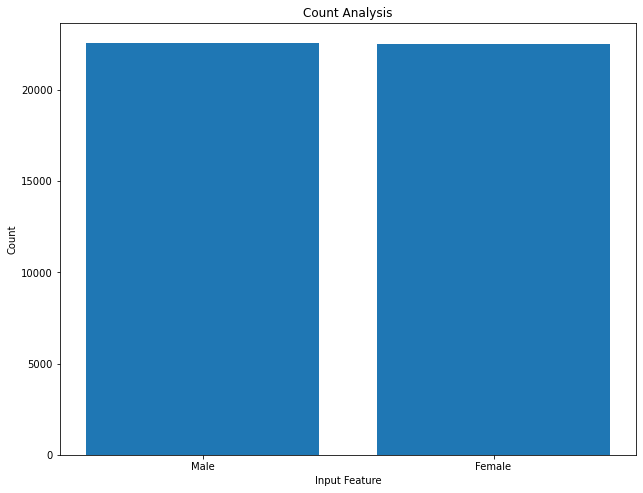

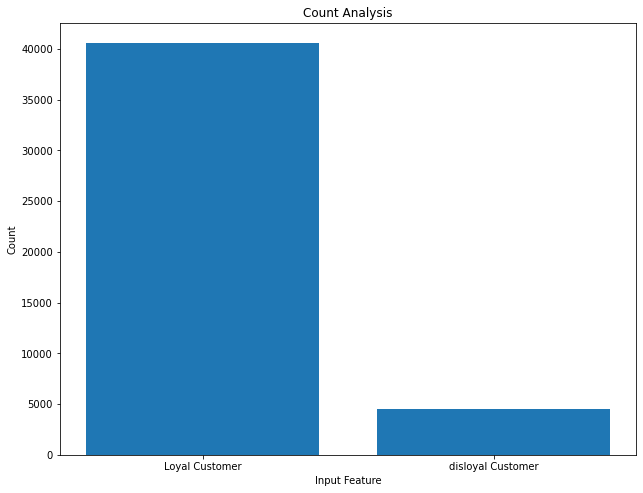

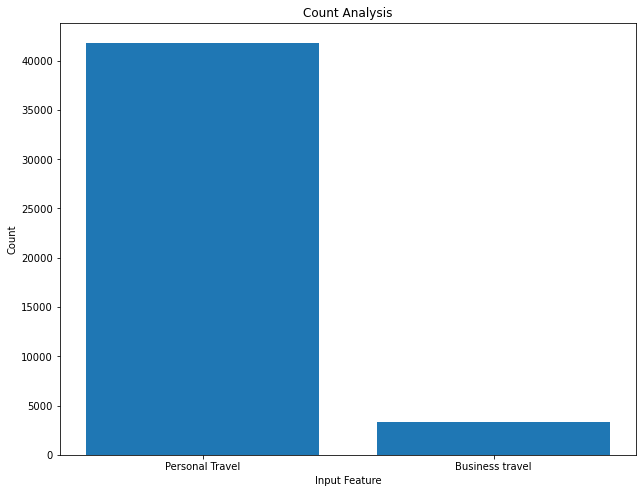

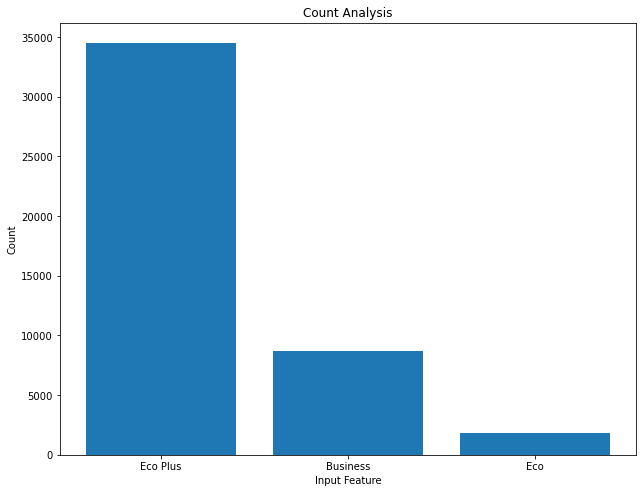

In [18]:
for column in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(train[column].unique(), train[train['satisfaction']=='satisfied'].groupby(column).count()['satisfaction'].values)
    ax.set_xlabel('Input Feature')
    ax.set_ylabel('Count')
    ax.set_title('Count Analysis')

Defining the Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()

Through label encoding, we replace the categorical value with a numeric value between 0 and the number of classes minus 1

In [20]:
train = train.drop(['Unnamed: 0', 'id'], axis = 1)
train['Gender'] = l_encoder.fit_transform(train['Gender'])
train['Customer Type'] = l_encoder.fit_transform(train['Customer Type'])
train['Type of Travel'] = l_encoder.fit_transform(train['Type of Travel'])
train['Class'] = l_encoder.fit_transform(train['Class'])
train['satisfaction'] = l_encoder.fit_transform(train['satisfaction'])

In [21]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [22]:
test = test.drop(['Unnamed: 0', 'id'], axis = 1)
test['Gender'] = l_encoder.fit_transform(test['Gender'])
test['Customer Type'] = l_encoder.fit_transform(test['Customer Type'])
test['Type of Travel'] = l_encoder.fit_transform(test['Type of Travel'])
test['Class'] = l_encoder.fit_transform(test['Class'])
test['satisfaction'] = l_encoder.fit_transform(test['satisfaction'])

In [23]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


# Checking null values

In [24]:
print(train.isnull().sum()[train.isnull().sum() != 0 ])
print(test.isnull().sum()[test.isnull().sum() != 0 ])

Arrival Delay in Minutes    310
dtype: int64
Arrival Delay in Minutes    83
dtype: int64


We can see the only column with null values is 'Arrival Delay in Minutes'. Now, we can check distribution to decide strategy to fill null values.

Text(0.5, 1.0, 'Heatmap of Correlation')

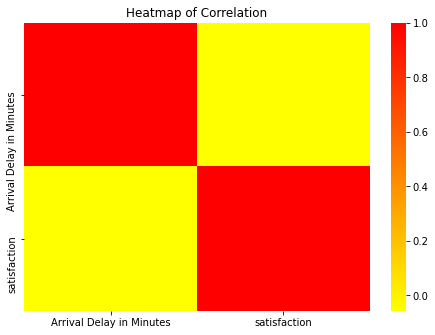

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sns.heatmap(train[['Arrival Delay in Minutes','satisfaction']].corr(), cmap=plt.cm.autumn_r)
ax.set_title('Heatmap of Correlation')

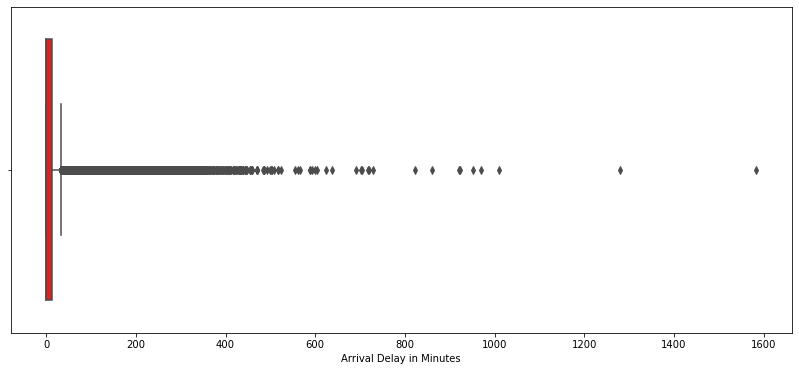

In [26]:
fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(train['Arrival Delay in Minutes'],color='Red')

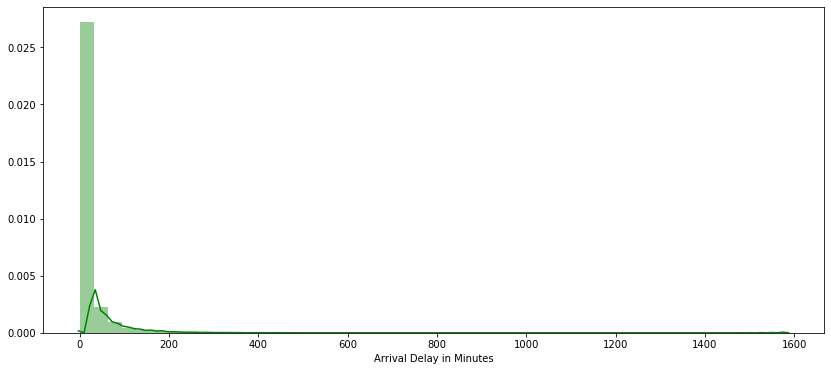

In [27]:
fig, ax = plt.subplots(figsize=(14,6))
sns.distplot(train['Arrival Delay in Minutes'],color='Green')

Data here is right-skewed, numerous outliers towards the right. So in this case, we'll be using 'median' to impute our data.

In [28]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
train['Arrival Delay in Minutes'] = imputer.fit_transform(train['Arrival Delay in Minutes'].values.reshape(-1,1))[:,0]
test['Arrival Delay in Minutes'] = imputer.fit_transform(test['Arrival Delay in Minutes'].values.reshape(-1,1))[:,0]
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [29]:
print(train.isnull().sum()[train.isnull().sum() != 0 ])
print(test.isnull().sum()[test.isnull().sum() != 0 ])

Series([], dtype: int64)
Series([], dtype: int64)


Now that we have eliminated the null values, and preprocessed the data, we can go ahead with normalization and hence model creation

In [30]:
train.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.182678,39.379706,0.310373,0.594135,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392,0.433333
std,0.499947,0.386404,15.114964,0.462649,0.620799,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776,0.495538
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


To check if we can drop any columns or not, we'll check the correlation heatmap

Text(0.5, 1.0, 'Heatmap of Train Dataset Correlation')

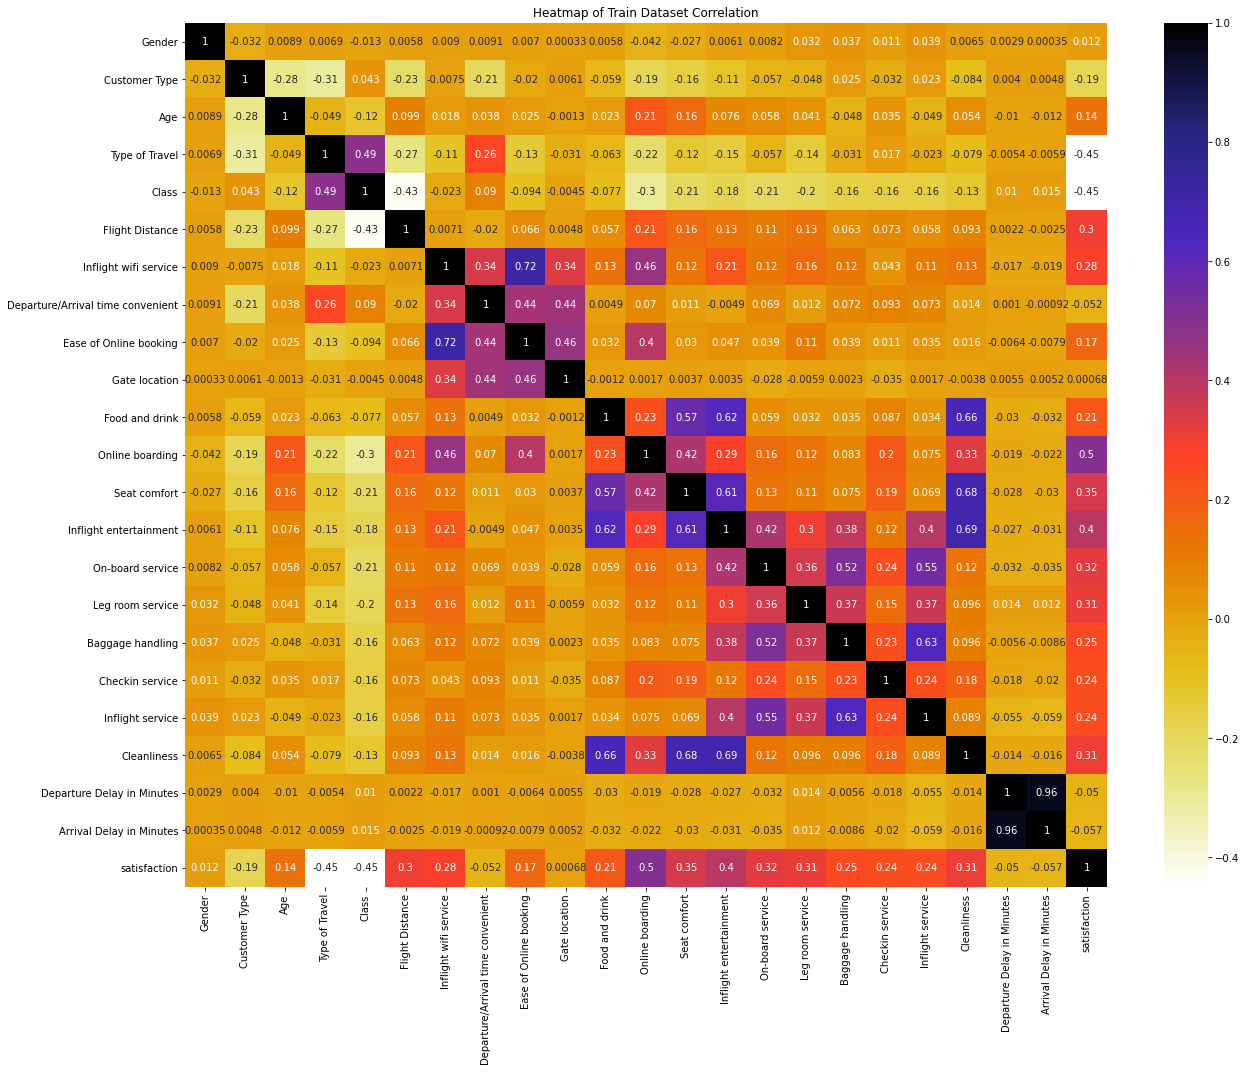

In [31]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_axes([0,0,1,1])
sns.heatmap(train.corr(), annot = True, cmap=plt.cm.CMRmap_r)
ax.set_title('Heatmap of Train Dataset Correlation')

From correlation heatmap, we can see that the low performing input features for 'satisfaction' are 
 
'Gate location','Gender', and 'Departure/Arrival Time Convenient'

the best with (0.5, 0.45, 0,45 respectively) are

'Online Booking','Class', and 'Type of Travel'

So, eliminate the categorical features 'Gate location',  'Gender'

In [32]:
#Features
train_features = train[[column for column in train.columns if column not in ['Gate location', 'Gender']]]
test_features = test[[column for column in train.columns if column not in ['Gate location', 'Gender']]]
#Labels
train_labels = train_features.pop('satisfaction')
test_labels = test_features.pop('satisfaction')

# Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_features = scaler.fit_transform(train_features)
test_features = scaler.fit_transform(test_features)

# Modelling

# Deep Neural Net Model

In [34]:
from tensorflow import keras

In [36]:
## Model initializing and adding layers
model = keras.Sequential(
    [keras.layers.Dense(32, activation='relu', input_shape=(train_features.shape[-1],)),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dropout(0.3),
     keras.layers.Dense(256, activation='relu'),
     keras.layers.Dropout(0.3),
     keras.layers.Dense(1, activation='sigmoid'),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 38,177
Trainable params: 38,177
Non-trainable params: 0
____________________________________________________

In [37]:
model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [38]:
model_history = model.fit(
    train_features,
    train_labels,
    batch_size=1024,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
82/82 [==============================] - 1s 5ms/step - loss: 0.2402 - accuracy: 0.8993 - val_loss: 0.1445 - val_accuracy: 0.9413
Epoch 2/100
82/82 [==============================] - 0s 4ms/step - loss: 0.1406 - accuracy: 0.9421 - val_loss: 0.1138 - val_accuracy: 0.9530
Epoch 3/100
82/82 [==============================] - 0s 4ms/step - loss: 0.1232 - accuracy: 0.9491 - val_loss: 0.1089 - val_accuracy: 0.9557
Epoch 4/100
82/82 [==============================] - 0s 4ms/step - loss: 0.1167 - accuracy: 0.9513 - val_loss: 0.1053 - val_accuracy: 0.9565
Epoch 5/100
82/82 [==============================] - 0s 5ms/step - loss: 0.1100 - accuracy: 0.9541 - val_loss: 0.1013 - val_accuracy: 0.9565
Epoch 6/100
82/82 [==============================] - 0s 4ms/step - loss: 0.1060 - accuracy: 0.9557 - val_loss: 0.1006 - val_accuracy: 0.9590
Epoch 7/100
82/82 [==============================] - 0s 4ms/step - loss: 0.1043 - accuracy: 0.9568 - val_loss: 0.0968 - val_accuracy: 0.9596
Epoch 8/100
8

Epoch 59/100
82/82 [==============================] - 0s 4ms/step - loss: 0.0813 - accuracy: 0.9644 - val_loss: 0.0901 - val_accuracy: 0.9627
Epoch 60/100
82/82 [==============================] - 0s 4ms/step - loss: 0.0818 - accuracy: 0.9644 - val_loss: 0.0887 - val_accuracy: 0.9631
Epoch 61/100
82/82 [==============================] - 0s 4ms/step - loss: 0.0810 - accuracy: 0.9648 - val_loss: 0.0899 - val_accuracy: 0.9636
Epoch 62/100
82/82 [==============================] - 0s 4ms/step - loss: 0.0820 - accuracy: 0.9643 - val_loss: 0.0892 - val_accuracy: 0.9641
Epoch 63/100
82/82 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.9646 - val_loss: 0.0911 - val_accuracy: 0.9615
Epoch 64/100
82/82 [==============================] - 0s 4ms/step - loss: 0.0817 - accuracy: 0.9640 - val_loss: 0.0907 - val_accuracy: 0.9626
Epoch 65/100
82/82 [==============================] - 0s 4ms/step - loss: 0.0821 - accuracy: 0.9645 - val_loss: 0.0895 - val_accuracy: 0.9634
Epoch 

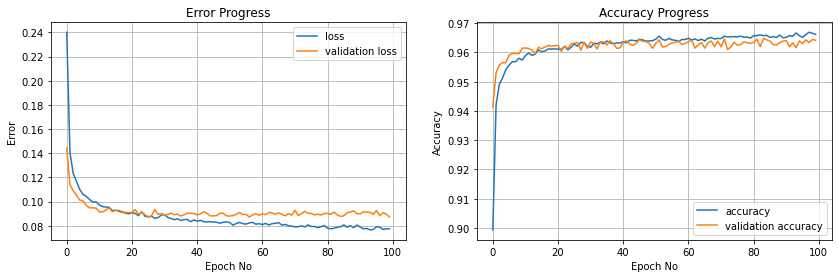

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 4))
axes[0].plot(model_history.history['loss'], label='loss')
axes[0].plot(model_history.history['val_loss'], label='validation loss')

axes[1].plot(model_history.history['accuracy'], label='accuracy')
axes[1].plot(model_history.history['val_accuracy'], label='validation accuracy')

axes[0].set_xlabel('Epoch No')
axes[0].set_ylabel('Error')
axes[0].set_title('Error Progress')
axes[0].legend()
axes[0].grid(True)

axes[1].set_xlabel('Epoch No')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Progress')
axes[1].legend()
axes[1].grid(True)

model with 96.19% accuracy.

In [40]:
accuracy_ann = model.evaluate(test_features, test_labels, verbose=0)[1]

In [41]:
prediction_ann = list(model.predict(test_features).flatten())

# DNN Model with more layers
Applying BatchNormalization to maintain the mean output close to 0, whereas the output of the standard deviation is close to 1 (1NF)

In [42]:
ann_model_bn = keras.Sequential(
    [keras.layers.Dense(32, activation='relu', input_shape=(train_features.shape[-1],)),
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(0.1),
     keras.layers.Dense(64, activation='relu'),
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(0.2),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(0.3),
     keras.layers.Dense(512, activation='relu'),
     keras.layers.Dropout(0.4),
     keras.layers.Dense(1, activation='sigmoid'),
    ]
)

ann_model_bn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                672       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [43]:
ann_model_bn.compile(
    optimizer=keras.optimizers.Adam(lr=0.01), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [44]:
ann_model_bn_history = ann_model_bn.fit(
    train_features,
    train_labels,
    batch_size=1024,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
82/82 [==============================] - 1s 10ms/step - loss: 0.2493 - accuracy: 0.8975 - val_loss: 0.1897 - val_accuracy: 0.9238
Epoch 2/100
82/82 [==============================] - 1s 8ms/step - loss: 0.1606 - accuracy: 0.9344 - val_loss: 0.1328 - val_accuracy: 0.9462
Epoch 3/100
82/82 [==============================] - 1s 8ms/step - loss: 0.1452 - accuracy: 0.9401 - val_loss: 0.1217 - val_accuracy: 0.9508
Epoch 4/100
82/82 [==============================] - 1s 9ms/step - loss: 0.1356 - accuracy: 0.9441 - val_loss: 0.1078 - val_accuracy: 0.9555
Epoch 5/100
82/82 [==============================] - 1s 10ms/step - loss: 0.1301 - accuracy: 0.9459 - val_loss: 0.1216 - val_accuracy: 0.9471
Epoch 6/100
82/82 [==============================] - 1s 10ms/step - loss: 0.1272 - accuracy: 0.9480 - val_loss: 0.1108 - val_accuracy: 0.9547
Epoch 7/100
82/82 [==============================] - 1s 9ms/step - loss: 0.1203 - accuracy: 0.9502 - val_loss: 0.1029 - val_accuracy: 0.9590
Epoch 8/10

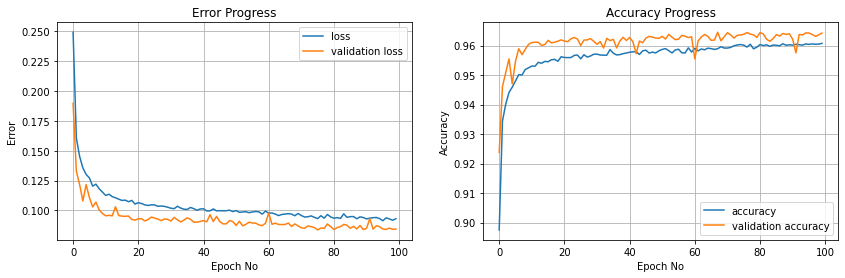

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14, 4))
axes[0].plot(ann_model_bn_history.history['loss'], label='loss')
axes[0].plot(ann_model_bn_history.history['val_loss'], label='validation loss')

axes[1].plot(ann_model_bn_history.history['accuracy'], label='accuracy')
axes[1].plot(ann_model_bn_history.history['val_accuracy'], label='validation accuracy')

axes[0].set_xlabel('Epoch No')
axes[0].set_ylabel('Error')
axes[0].set_title('Error Progress')
axes[0].legend()
axes[0].grid(True)

axes[1].set_xlabel('Epoch No')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Progress')
axes[1].legend()
axes[1].grid(True)

this model has accuracy of 96.44% and which is little better than our previous network model

In [48]:
accuracy_annbn = ann_model_bn.evaluate(test_features, test_labels, verbose=0)[1]

In [49]:
prediction_annbn = list(ann_model_bn.predict(test_features).flatten())

# Model Comparison

In [50]:
accuracyscores = [accuracy_ann, accuracy_annbn]
model_scores = pd.DataFrame(accuracyscores, index=['ANN', 'ANN with BN'], columns=['Accuracy'])
model_scores

,Accuracy
ANN,0.962812
ANN with BN,0.963659


In [51]:
model_predictions = pd.DataFrame(list(zip(test_labels, map(round, prediction_ann), map(round, prediction_annbn))), 
                                 columns=['Actual Labels', 'ANN', 'ANN with BN'])

model_predictions

,Actual Labels,ANN,ANN with BN
0,1,1,1
1,1,1,1
2,0,0,0
3,1,1,1
4,1,0,0
...,...,...,...
25971,0,0,0
25972,1,1,1
25973,0,0,0
25974,1,1,1


In [52]:
prediction_results = list(map(lambda x: round(100-x*100, 2), model_scores['Accuracy']))
labels = [ 'ANN', 'ANN with BN']

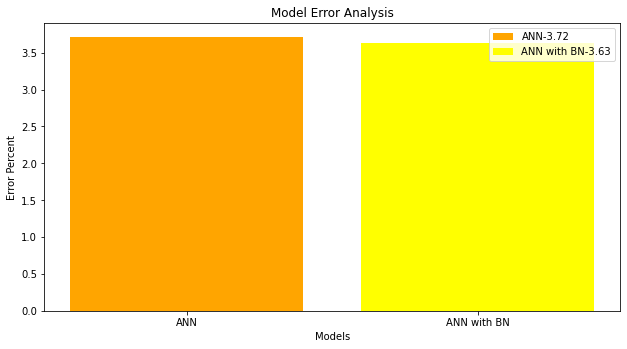

In [53]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
colors=['orange','yellow']
ax.bar(labels[0], prediction_results[0], color='orange', label=labels[0]+'-'+str(prediction_results[0]))
ax.bar(labels[1], prediction_results[1], color='yellow', label=labels[1]+'-'+str(prediction_results[1]))
ax.set_xlabel('Models')
ax.set_ylabel('Error Percent')
ax.set_xticklabels(labels)
ax.set_title('Model Error Analysis')
ax.legend()